In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

In [2]:
df= pd.read_csv('MDf_NAFilled.csv')
df

,Unnamed: 0,Unnamed: 0.1,ADMID,PATIENTID,Average_Age,PROBLEM,PROB_NAME,ADM_DATE,DIS_DATE,LOS,...,Ionised calcium,Lactate,White cell,DBP,HEIGHT,HR,O2SAT,RR,SBP,WEIGHT
0,0,0,566AF9016D2E9318EA7A3B3B8EF4441ABFE079F185CDB2...,3AB8F46DDDA4CC8466E3146BB26D8B5BD9E3B72D64EF22...,92,700097003.0,Hip fracture,35550,35565,15,...,1.220000,2.200000,12.270000,64.0,67.200000,80.0,96.0,14.0,141.0,69.999200
1,1,1,9997C278C602FABFE2BBDFAB818D67EF9C940418C75763...,D10067B6DE953CD140EBEFCEE70698B0CAEFF1BB557252...,82,700097003.0,Hip fracture,31824,31858,34,...,1.172366,1.787164,10.382805,62.0,62.008000,90.0,96.0,15.0,114.0,63.219396
2,2,2,9997C278C602FABFE2BBDFAB818D67EF9C940418C75763...,D10067B6DE953CD140EBEFCEE70698B0CAEFF1BB557252...,82,5913000.0,Fracture of neck of left femur,31824,31858,34,...,1.172366,1.787164,10.382805,62.0,62.008000,90.0,96.0,15.0,114.0,63.219396
3,3,3,A53241F3859B28AC2E43A68B8B24BE5806EA1341B1D16D...,4801FB1837D0F9A5F6041D39E48A72E9AC054365A4D202...,77,127287001.0,Intertrochanteric fracture of left hip,30203,30205,2,...,1.172366,1.787164,8.600000,63.0,64.790197,74.0,93.0,15.0,104.0,63.219396
4,4,4,BFA87E0D17A3084607B9439431707EEE54189FAC5AE26C...,CA5F39A757C1E534F2A95B3C730401ADEC3422C54A3F70...,82,127287001.0,Intertrochanteric fracture of left hip,32191,32196,5,...,1.230000,1.400000,12.870000,67.0,64.790197,91.0,100.0,15.0,112.0,63.219396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1203,1447,5264ED483D6DD14F34C7F41DBF5075B1812CB3149AB7F7...,59F3A979B8E5C797D425696F17530AC9EA020C2DCB9195...,82,700097003.0,"Hip fracture, right",31577,31594,17,...,1.120000,0.900000,11.700000,44.0,64.790197,96.0,97.0,16.0,98.0,63.219396
1204,1204,1448,9D04FE81A460B8242DC9548F2CD8921F4E0936A888C8A3...,222C0D67EE0A7D3722DFC9745E76074612AC706520EF06...,82,5913000.0,Fracture of neck of left femur,32235,32251,16,...,1.172366,1.787164,10.382805,54.0,64.790197,109.0,95.0,16.0,112.0,63.219396
1205,1205,1449,665FFC079CC5ACD04A4F6A7F7FF724897586A3AC6625B8...,92CF2F32964A9F8CAD9DF05CF7EBE8D7E3B5B1729C7AE1...,87,5913000.0,Fracture of neck of right femur,34372,34381,9,...,1.172366,1.787164,10.382805,50.0,64.790197,73.0,98.0,16.0,123.0,63.219396
1206,1206,1450,5FDAC7A8655D26734D99CE76A5CCDCDBC08243A5F0D860...,C77CE976D4B2D0F75FD3CF77B7119E4AC9208FE374097F...,92,5913000.0,Fracture of neck of left femur,35807,35814,7,...,1.172366,1.787164,13.000000,60.0,60.000000,91.0,97.0,15.0,114.0,63.219396


In [3]:
df = df.rename(columns={'MED_HX_NAME': 'Medical_Comorbidities'})

In [4]:
 df.corr('pearson')

,Unnamed: 0,Unnamed: 0.1,Average_Age,PROBLEM,ADM_DATE,DIS_DATE,LOS,OP_STRT_DATE,Days_To_Op,GENDER,...,Ionised calcium,Lactate,White cell,DBP,HEIGHT,HR,O2SAT,RR,SBP,WEIGHT
Unnamed: 0,1.000000,0.999917,-0.013084,0.023404,-0.015328,-0.015439,-0.042274,-0.015328,-0.000973,0.015136,...,-0.014036,0.033713,0.002161,-0.024003,-0.045481,-0.040226,0.021632,-0.020242,0.006077,0.041992
Unnamed: 0.1,0.999917,1.000000,-0.012446,0.023111,-0.014747,-0.014859,-0.042813,-0.014747,-0.001329,0.014502,...,-0.013333,0.033660,0.002545,-0.023864,-0.044972,-0.039847,0.021265,-0.020234,0.005789,0.041979
Average_Age,-0.013084,-0.012446,1.000000,-0.076345,0.990411,0.990414,0.196556,0.990410,0.024788,0.104238,...,0.040575,0.009916,-0.039962,0.006337,-0.161227,-0.047364,0.017360,0.079396,0.083209,-0.186715
PROBLEM,0.023404,0.023111,-0.076345,1.000000,-0.071505,-0.071495,-0.010581,-0.071502,0.002446,0.007670,...,0.022244,-0.071896,-0.031885,0.020381,-0.032318,-0.022414,-0.017848,-0.069579,-0.002975,-0.054468
ADM_DATE,-0.015328,-0.014747,0.990411,-0.071505,1.000000,0.999996,0.196179,1.000000,0.027965,0.103271,...,0.041467,0.015091,-0.040059,0.007792,-0.165546,-0.049674,0.020493,0.079911,0.085031,-0.188554
DIS_DATE,-0.015439,-0.014859,0.990414,-0.071495,0.999996,1.000000,0.198888,0.999996,0.028489,0.103146,...,0.041376,0.015243,-0.039982,0.007790,-0.165588,-0.049658,0.020585,0.079921,0.084906,-0.188615
LOS,-0.042274,-0.042813,0.196556,-0.010581,0.196179,0.198888,1.000000,0.196271,0.191666,-0.023772,...,-0.023917,0.056874,0.019454,0.001083,-0.047602,-0.004125,0.036684,0.019183,-0.027563,-0.059096
OP_STRT_DATE,-0.015328,-0.014747,0.990410,-0.071502,1.000000,0.999996,0.196271,1.000000,0.028461,0.103275,...,0.041486,0.015123,-0.040058,0.007814,-0.165565,-0.049676,0.020479,0.079953,0.085060,-0.188552
Days_To_Op,-0.000973,-0.001329,0.024788,0.002446,0.027965,0.028489,0.191666,0.028461,1.000000,0.010932,...,0.039287,0.064777,0.002209,0.044855,-0.043092,-0.005660,-0.026902,0.086114,0.059988,-0.001877
GENDER,0.015136,0.014502,0.104238,0.007670,0.103271,0.103146,-0.023772,0.103275,0.010932,1.000000,...,0.038082,-0.083559,-0.009622,-0.059268,-0.434889,0.081820,0.042411,-0.068824,0.088446,-0.283474


<AxesSubplot:xlabel='Medical_Comorbidities', ylabel='LOS'>

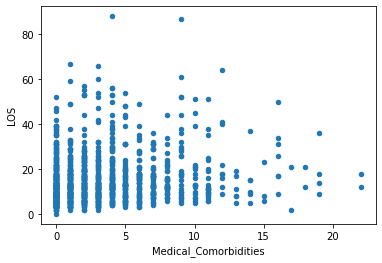

In [5]:
df.plot(x='Medical_Comorbidities',y='LOS',kind='scatter')
 

In [6]:
from statsmodels.formula.api import ols
lm = ols('LOS ~ Medical_Comorbidities',data=df).fit() 
lm.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     28.11
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.36e-07
Time:                        10:47:57   Log-Likelihood:                -4594.1
No. Observations:                1208   AIC:                             9192.
Df Residuals:                    1206   BIC:                             9202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                13.9734      0.421     33.201      0.000      13.148      14.799
Medical_Comorbidities     0.4556      0.086      5.302      0.000       0.287       0.624
==============================================================================
Omnibus:                      512.401   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2410.221
Skew:                           1.976   Prob(JB):                         0.00
Kurtosis:                       8.681   Cond. No.                         6.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from statsmodels.stats.anova import anova_lm 
aov_table = anova_lm(lm,typ=1)
aov_table
 

,df,sum_sq,mean_sq,F,PR(>F)
Medical_Comorbidities,1.0,3314.554861,3314.554861,28.109546,1.362431e-07
Residual,1206.0,142206.249775,117.915630,NaN,NaN


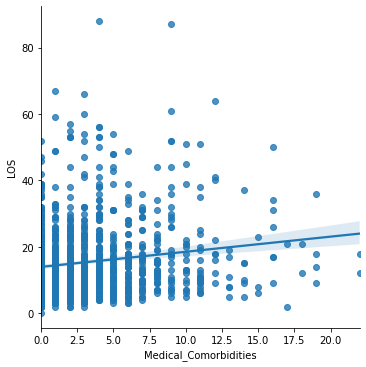

In [9]:
from seaborn import lmplot 
lmplot(x='Medical_Comorbidities',y='LOS',data=df, fit_reg=True)
 

<AxesSubplot:xlabel='Lactate', ylabel='LOS'>

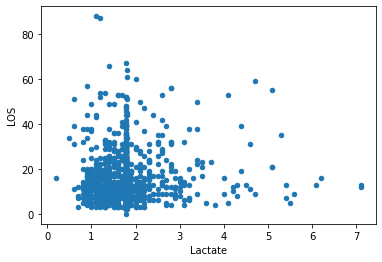

In [10]:
df.plot(x='Lactate',y='LOS',kind='scatter')


In [11]:
from statsmodels.formula.api import ols
lm2 = ols('LOS ~ Lactate',data=df).fit() 
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.914
Date:                Thu, 20 Apr 2023   Prob (F-statistic):             0.0481
Time:                        10:54:09   Log-Likelihood:                -4606.1
No. Observations:                1208   AIC:                             9216.
Df Residuals:                    1206   BIC:                             9226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8156      0.893     15.468      0.000      12.063      15.568
Lactate        0.9249      0.468      1.978      0.048       0.008       1.842
==============================================================================
Omnibus:                      521.244   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2524.532
Skew:                           2.003   Prob(JB):                         0.00
Kurtosis:                       8.840   Cond. No.                         6.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
aov_table = anova_lm(lm2,typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Lactate,1.0,470.712344,470.712344,3.913676,0.048122
Residual,1206.0,145050.092292,120.273708,NaN,NaN


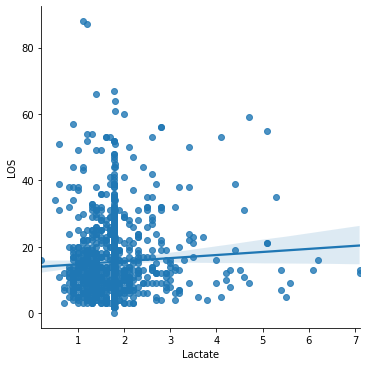

In [14]:
lmplot(x='Lactate',y='LOS',data=df, fit_reg=True)

<AxesSubplot:xlabel='Haemoglobin', ylabel='LOS'>

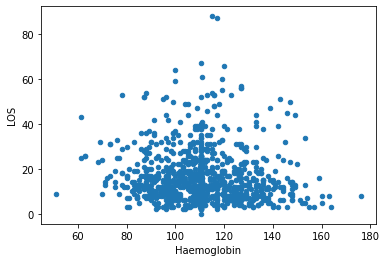

In [15]:
df.plot(x='Haemoglobin',y='LOS',kind='scatter')


In [16]:
from statsmodels.formula.api import ols
lm3 = ols('LOS ~ Haemoglobin',data=df).fit() 
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     7.889
Date:                Thu, 20 Apr 2023   Prob (F-statistic):            0.00505
Time:                        10:56:06   Log-Likelihood:                -4604.1
No. Observations:                1208   AIC:                             9212.
Df Residuals:                    1206   BIC:                             9222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      21.7985      2.276      9.579      0.000      17.334      26.263
Haemoglobin    -0.0572      0.020     -2.809      0.005      -0.097      -0.017
==============================================================================
Omnibus:                      531.727   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2643.906
Skew:                           2.040   Prob(JB):                         0.00
Kurtosis:                       8.990   Cond. No.                         807.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
aov_table = anova_lm(lm3,typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Haemoglobin,1.0,945.745883,945.745883,7.889117,0.005054
Residual,1206.0,144575.058753,119.879817,NaN,NaN


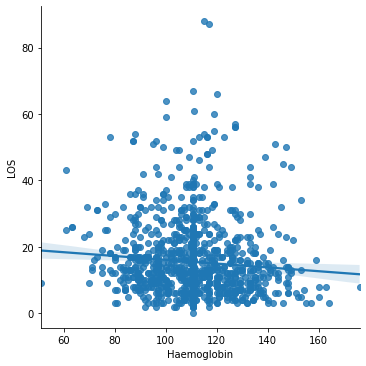

In [18]:
lmplot(x='Haemoglobin',y='LOS',data=df, fit_reg=True)

<AxesSubplot:xlabel='Creatinine', ylabel='LOS'>

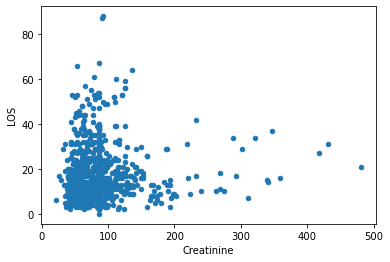

In [19]:
df.plot(x='Creatinine',y='LOS',kind='scatter')

In [20]:
from statsmodels.formula.api import ols
lm4 = ols('LOS ~ Creatinine',data=df).fit() 
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.981
Date:                Thu, 20 Apr 2023   Prob (F-statistic):             0.0462
Time:                        11:01:50   Log-Likelihood:                -4606.1
No. Observations:                1208   AIC:                             9216.
Df Residuals:                    1206   BIC:                             9226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.1177      0.747     18.900      0.000      12.652      15.583
Creatinine     0.0157      0.008      1.995      0.046       0.000       0.031
==============================================================================
Omnibus:                      521.931   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2506.110
Skew:                           2.010   Prob(JB):                         0.00
Kurtosis:                       8.799   Cond. No.                         225.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
aov_table = anova_lm(lm4,typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Creatinine,1.0,478.752257,478.752257,3.980744,0.046248
Residual,1206.0,145042.052379,120.267042,NaN,NaN


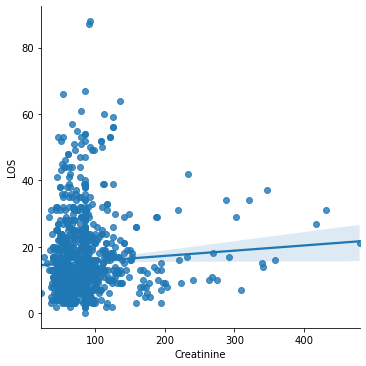

In [22]:
lmplot(x='Creatinine',y='LOS',data=df, fit_reg=True)

In [23]:
df = df.rename(columns={'Ionised calcium': 'Ca', 'White cell': 'WCC'})
df.head()

,Unnamed: 0,Unnamed: 0.1,ADMID,PATIENTID,Average_Age,PROBLEM,PROB_NAME,ADM_DATE,DIS_DATE,LOS,...,Ca,Lactate,WCC,DBP,HEIGHT,HR,O2SAT,RR,SBP,WEIGHT
0,0,0,566AF9016D2E9318EA7A3B3B8EF4441ABFE079F185CDB2...,3AB8F46DDDA4CC8466E3146BB26D8B5BD9E3B72D64EF22...,92,700097003.0,Hip fracture,35550,35565,15,...,1.220000,2.200000,12.270000,64.0,67.200000,80.0,96.0,14.0,141.0,69.999200
1,1,1,9997C278C602FABFE2BBDFAB818D67EF9C940418C75763...,D10067B6DE953CD140EBEFCEE70698B0CAEFF1BB557252...,82,700097003.0,Hip fracture,31824,31858,34,...,1.172366,1.787164,10.382805,62.0,62.008000,90.0,96.0,15.0,114.0,63.219396
2,2,2,9997C278C602FABFE2BBDFAB818D67EF9C940418C75763...,D10067B6DE953CD140EBEFCEE70698B0CAEFF1BB557252...,82,5913000.0,Fracture of neck of left femur,31824,31858,34,...,1.172366,1.787164,10.382805,62.0,62.008000,90.0,96.0,15.0,114.0,63.219396
3,3,3,A53241F3859B28AC2E43A68B8B24BE5806EA1341B1D16D...,4801FB1837D0F9A5F6041D39E48A72E9AC054365A4D202...,77,127287001.0,Intertrochanteric fracture of left hip,30203,30205,2,...,1.172366,1.787164,8.600000,63.0,64.790197,74.0,93.0,15.0,104.0,63.219396
4,4,4,BFA87E0D17A3084607B9439431707EEE54189FAC5AE26C...,CA5F39A757C1E534F2A95B3C730401ADEC3422C54A3F70...,82,127287001.0,Intertrochanteric fracture of left hip,32191,32196,5,...,1.230000,1.400000,12.870000,67.0,64.790197,91.0,100.0,15.0,112.0,63.219396


<AxesSubplot:xlabel='WEIGHT', ylabel='LOS'>

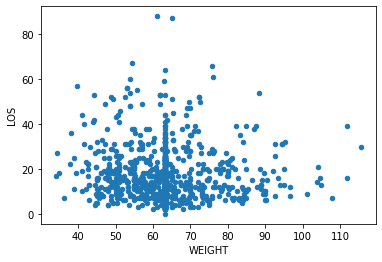

In [24]:
df.plot(x='WEIGHT',y='LOS',kind='scatter')

In [25]:
from statsmodels.formula.api import ols
lm5 = ols('LOS ~ WEIGHT',data=df).fit() 
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.227
Date:                Thu, 20 Apr 2023   Prob (F-statistic):             0.0400
Time:                        11:02:09   Log-Likelihood:                -4605.9
No. Observations:                1208   AIC:                             9216.
Df Residuals:                    1206   BIC:                             9226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.6189      2.043      9.602      0.000      15.610      23.628
WEIGHT        -0.0656      0.032     -2.056      0.040      -0.128      -0.003
==============================================================================
Omnibus:                      519.805   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2487.208
Skew:                           2.002   Prob(JB):                         0.00
Kurtosis:                       8.778   Cond. No.                         415.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
aov_table = anova_lm(lm5,typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
WEIGHT,1.0,508.213678,508.213678,4.226569,0.040011
Residual,1206.0,145012.590958,120.242613,NaN,NaN


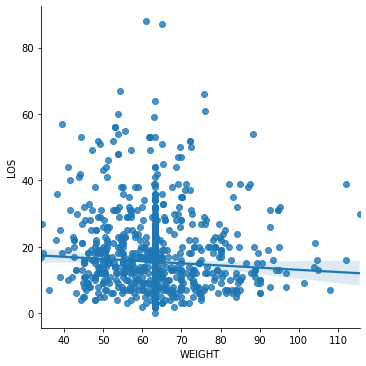

In [27]:
lmplot(x='WEIGHT',y='LOS',data=df, fit_reg=True)

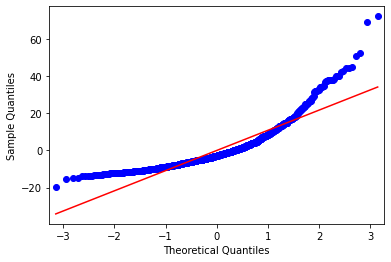

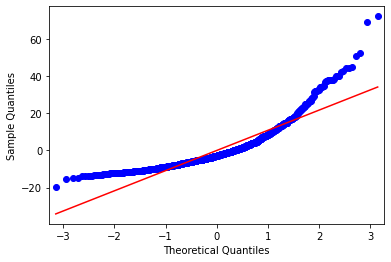

In [28]:
from statsmodels.graphics.gofplots import qqplot 
qqplot(lm.resid,line='s') # Q-Q plot

Text(0, 0.5, 'Residuals')

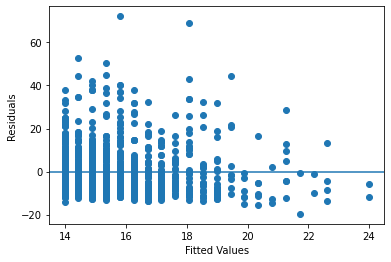

In [35]:
plt.figure() ,
plt.scatter(lm.fittedvalues,lm.resid),
plt.axhline(y=0),
plt.xlabel('Fitted Values'),
plt.ylabel('Residuals')
 

Text(0, 0.5, "Cook's DIstance")

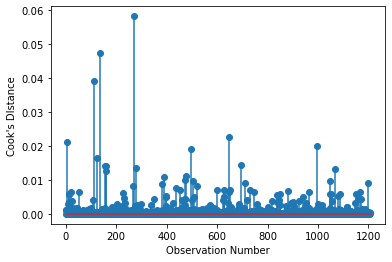

In [39]:
cooks=lm.get_influence().cooks_distance[0] 
plt.stem(range(len(cooks)),cooks) #Cook’s distance  
plt.xlabel('Observation Number'), 
plt.ylabel("Cook's DIstance")
 

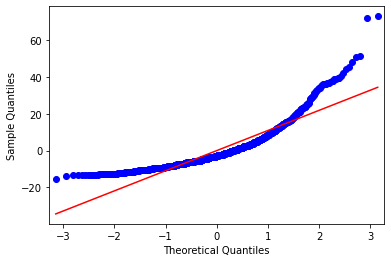

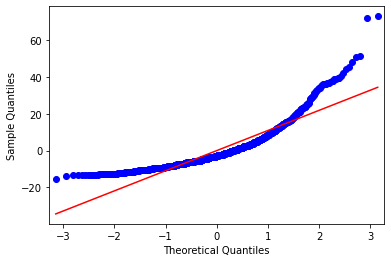

In [40]:
from statsmodels.graphics.gofplots import qqplot 
qqplot(lm2.resid,line='s') # Q-Q plot

Text(0, 0.5, 'Residuals')

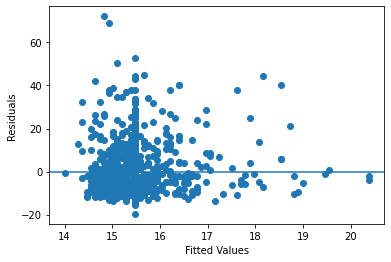

In [41]:
plt.figure() ,
plt.scatter(lm2.fittedvalues,lm.resid),
plt.axhline(y=0),
plt.xlabel('Fitted Values'),
plt.ylabel('Residuals')

#resid vs fitted values

Text(0, 0.5, "Cook's DIstance")

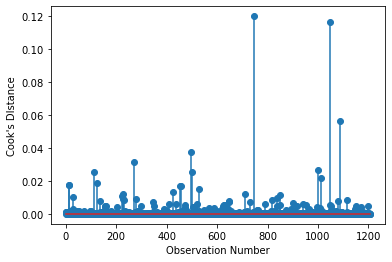

In [44]:
cooks=lm2.get_influence().cooks_distance[0] 
plt.stem(range(len(cooks)),cooks)
plt.xlabel('Observation Number'), 
plt.ylabel("Cook's DIstance")#Cook’s distance

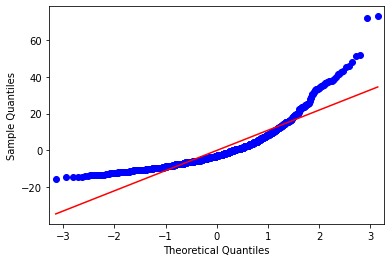

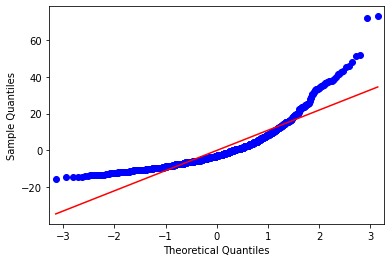

In [45]:
from statsmodels.graphics.gofplots import qqplot 
qqplot(lm3.resid,line='s') # Q-Q plot

Text(0, 0.5, 'Residuals')

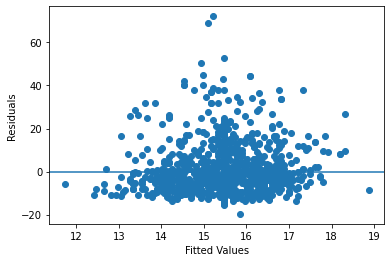

In [46]:
plt.figure() ,
plt.scatter(lm3.fittedvalues,lm.resid),
plt.axhline(y=0),
plt.xlabel('Fitted Values'),
plt.ylabel('Residuals')#resid vs fitted values

<StemContainer object of 3 artists>

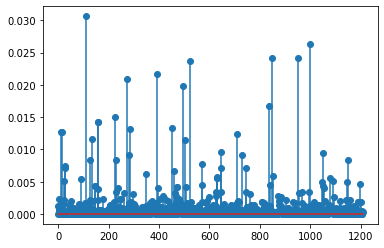

In [47]:
cooks=lm3.get_influence().cooks_distance[0] 
plt.stem(range(len(cooks)),cooks) #Cook’s distance

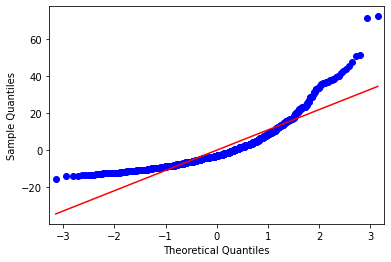

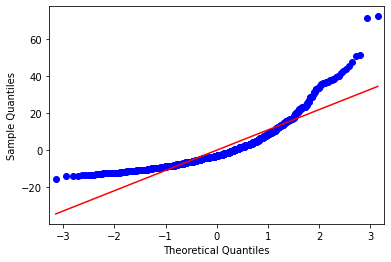

In [48]:
from statsmodels.graphics.gofplots import qqplot 
qqplot(lm4.resid,line='s') # Q-Q plot

Text(0, 0.5, 'Residuals')

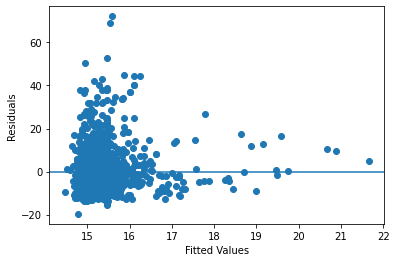

In [49]:
plt.figure() ,
plt.scatter(lm4.fittedvalues,lm.resid),
plt.axhline(y=0),
plt.xlabel('Fitted Values'),
plt.ylabel('Residuals')#resid vs fitted values

<StemContainer object of 3 artists>

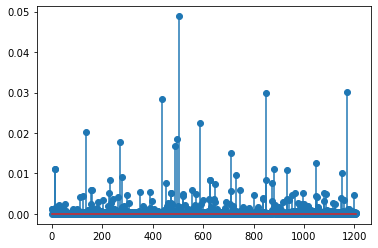

In [50]:
cooks=lm4.get_influence().cooks_distance[0] 
plt.stem(range(len(cooks)),cooks) #Cook’s distance

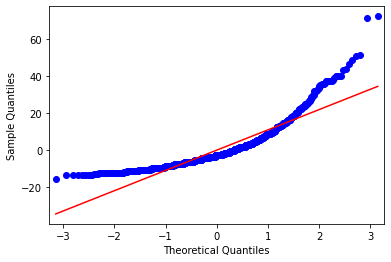

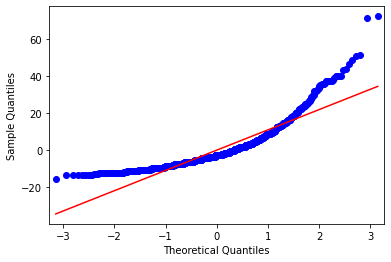

In [51]:
from statsmodels.graphics.gofplots import qqplot 
qqplot(lm5.resid,line='s') # Q-Q plot

Text(0, 0.5, 'Residuals')

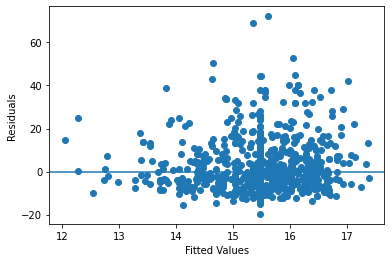

In [52]:
plt.figure() ,
plt.scatter(lm5.fittedvalues,lm.resid),
plt.axhline(y=0),
plt.xlabel('Fitted Values'),
plt.ylabel('Residuals')#resid vs fitted values

<StemContainer object of 3 artists>

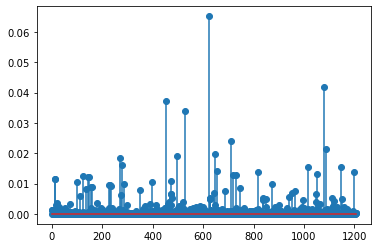

In [53]:
cooks=lm5.get_influence().cooks_distance[0] 
plt.stem(range(len(cooks)),cooks) #Cook’s distance